In [2]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
path = '/mnt/data4/Abhishek/WP/'
path_vpf = '/mnt/data4/Abhishek/VPF/random/'

In [4]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [5]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [6]:
random_data = []

for filename in os.listdir(path):
    if filename.startswith('wp_galaxies'):
        pos = extractIndex(filename)
        wp,_ = np.load(os.path.join(path,filename))
        _,vpf = np.load(os.path.join(path_vpf,'vpf_'+filename[3:]))
        _temp = np.concatenate((vpf,wp,f[pos]))
        random_data.append(_temp)

In [7]:
full_data = np.vstack((random_data))
del random_data
np.random.shuffle(full_data)

In [8]:
y_data = full_data[:,30:-5]
X_data = full_data[:,-5:]

In [9]:
y_data

array([[289.99783916, 267.79742932, 244.29862808, ...,   5.47727813,
          4.02657313,   2.82384263],
       [270.47072475, 250.23330682, 228.43437411, ...,   5.2841722 ,
          3.88111375,   2.72523213],
       [355.50856621, 323.60810582, 293.87184571, ...,   5.97419028,
          4.38421473,   3.0615727 ],
       ...,
       [229.87087135, 214.53745702, 196.99026616, ...,   4.95452539,
          3.62709509,   2.55268348],
       [282.27543736, 260.5542597 , 236.98764213, ...,   5.36802611,
          3.94770834,   2.7686294 ],
       [263.8309136 , 244.51534605, 223.06164435, ...,   5.22153451,
          3.83585859,   2.70357794]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [11]:
X_train.shape, y_test.shape

((4500, 5), (500, 29))

In [12]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [13]:
mean_squared_error(y_rf,y_test,multioutput='raw_values',squared=False)

array([6.42767642e+00, 6.00559053e+00, 4.91389839e+00, 4.18906526e+00,
       3.91554221e+00, 3.41617690e+00, 3.03322226e+00, 2.86731113e+00,
       2.52094672e+00, 2.18434896e+00, 1.77621454e+00, 1.23767456e+00,
       7.40823342e-01, 4.19604840e-01, 2.18000532e-01, 1.05667051e-01,
       5.35730017e-02, 3.10069924e-02, 1.97947103e-02, 1.37822577e-02,
       1.01061932e-02, 7.12334219e-03, 4.88655966e-03, 3.41804436e-03,
       2.21834105e-03, 1.46017723e-03, 9.09393347e-04, 5.30408375e-04,
       3.00290612e-04])

In [14]:
print (np.mean(((y_rf - y_test)/y_test)*100, axis=0))

[ 0.01793114  0.00783291  0.02991653  0.03303557  0.04734502  0.0466398
  0.04902883  0.05847381  0.06578604  0.06284393  0.07488439  0.07791103
  0.05902917  0.04807862  0.05231092  0.04556968  0.0345736   0.02264099
  0.02270859  0.0195759   0.01493322  0.0199298   0.01453754  0.01439123
  0.01812074  0.01983183  0.01328362 -0.00050518  0.00805751]


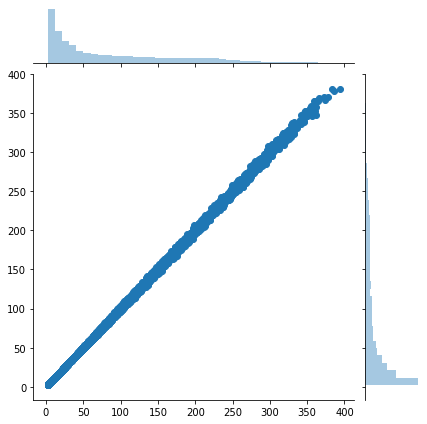

In [15]:
sns.jointplot(y_test,y_rf,kind='scatter')

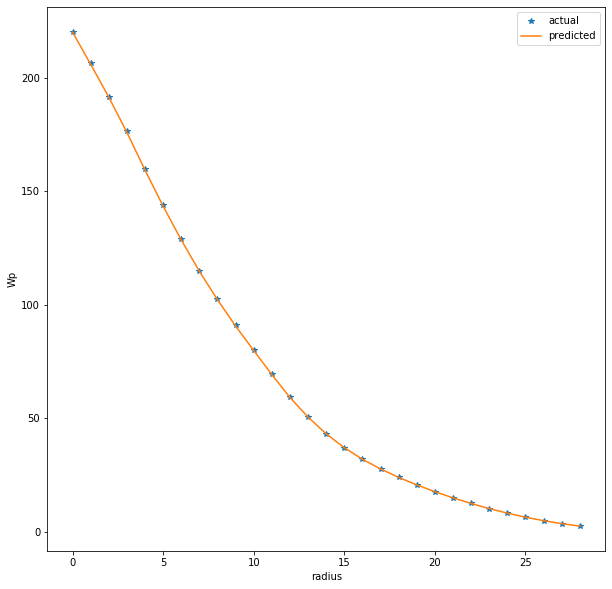

In [21]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(29),y_test[10,:],'*',label='actual')
plt.plot(np.arange(29),y_rf[10],label='predicted')
plt.legend()
plt.xlabel('radius')
plt.ylabel('Wp')
plt.savefig('Wp_fittng.png')

In [22]:
dely = y_rf - y_test

In [23]:
radius = np.logspace(-1,1.5,29)
mean = np.mean(dely,axis = 0)
std = np.std(dely,axis = 0)

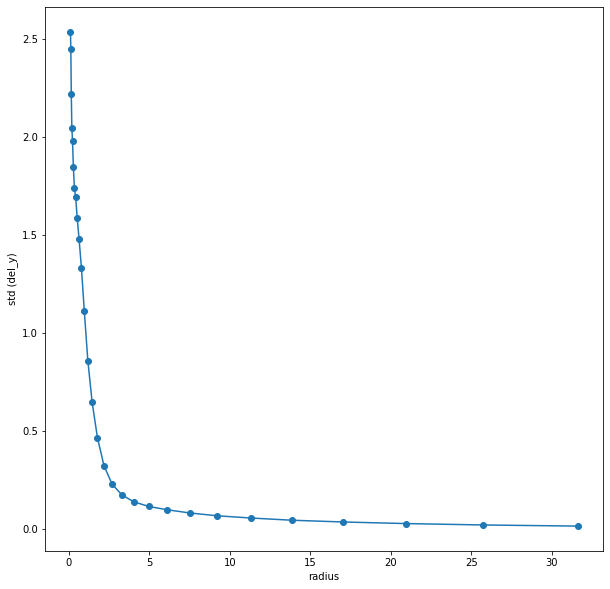

In [24]:
plt.figure(figsize=(10,10))
plt.plot(radius,std,'o-')
plt.ylabel('std (del_y)')
plt.xlabel('radius')
plt.savefig('WP_Std_vs_radius.png')

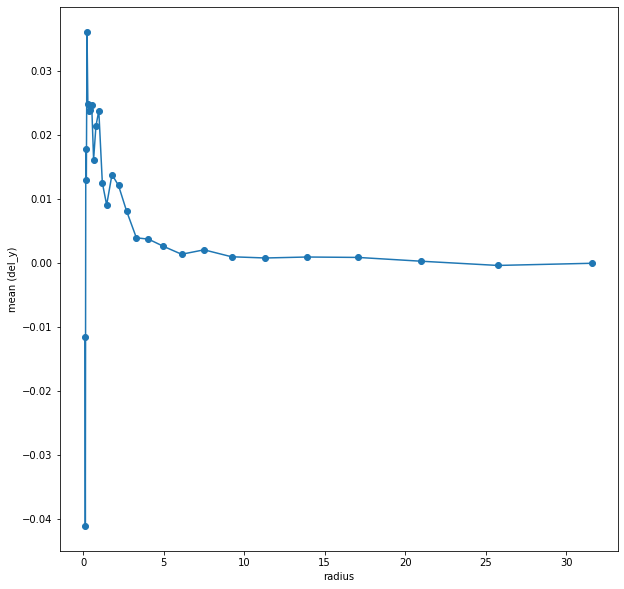

In [25]:
plt.figure(figsize=(10,10))
plt.plot(radius,mean,'o-')
plt.ylabel('mean (del_y)')
plt.xlabel('radius')
plt.savefig('WP_mean_vs_radius.png')

In [26]:
maximum = np.max(dely,axis=1)


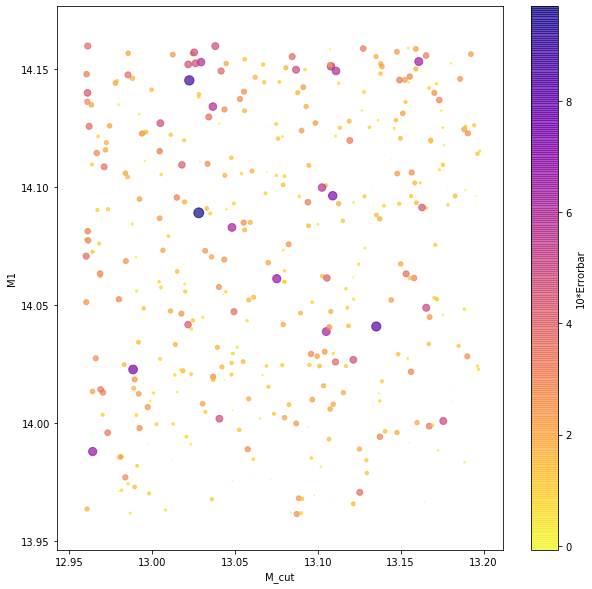

In [31]:
from matplotlib import cm
plt.figure(figsize=(10,10))
plt.scatter(X_test[:,0],X_test[:,1],c=maximum,s = 10*maximum,cmap='plasma_r',alpha=0.7)
plt.xlabel('M_cut')
plt.ylabel('M1')
cbar = plt.colorbar()
cbar.set_label('10*Errorbar')
plt.savefig('WP_M1_vs_M_cut.png')

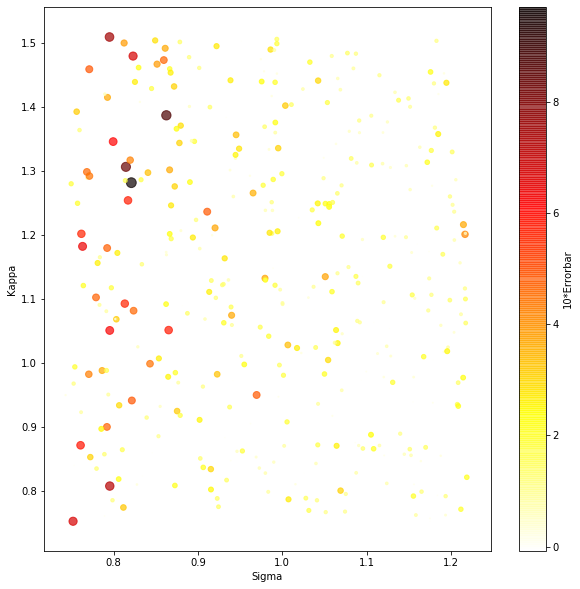

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[:,2],X_test[:,3],c=maximum,s = 10*maximum,cmap='hot_r',alpha=0.7)
plt.xlabel('Sigma')
plt.ylabel('Kappa')
cbar = plt.colorbar()
cbar.set_label('10*Errorbar')
plt.savefig('WP_Kappa_vs_Sigma.png')

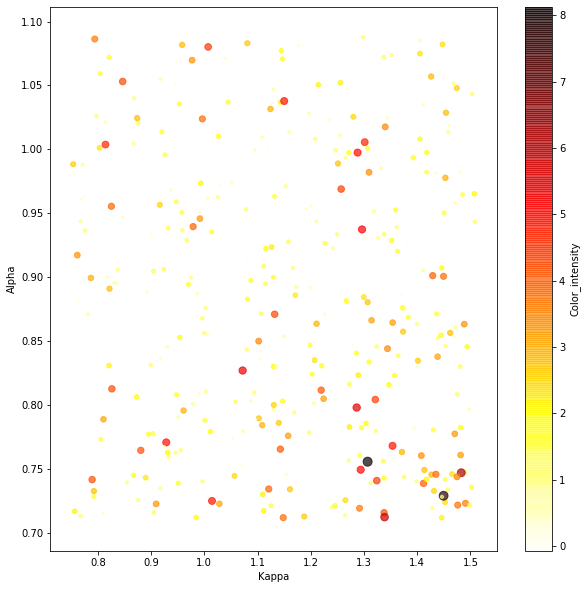

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[:,3],X_test[:,4],c=maximum,s = 10*maximum,cmap='hot_r',alpha=0.7)
plt.xlabel('Kappa')
plt.ylabel('Alpha')
cbar = plt.colorbar()
cbar.set_label('Color_intensity')

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X_data= sc.fit_transform(X_data)
y_data= y_data.reshape(-1,30)
y_data=sc.fit_transform(y_data)

in_dim = X_train.shape[1]
out_dim = y_train.shape[1]



Using TensorFlow backend.
/home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/fra

In [12]:
def build_model(in_dim,out_dim):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=in_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(out_dim)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.0001)

    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model

In [13]:
mod = build_model(in_dim,out_dim)
mod.summary()

W0503 22:28:47.423933 140240045057856 deprecation.py:506] From /home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1950      
Total params: 44,638
Trainable params: 44,638
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = mod.fit(X_train, y_train, epochs=200,validation_split=0.2, verbose=1)

Train on 3600 samples, validate on 900 samples
Epoch 1/300
3600/3600 [==============================] - 1s 153us/sample - loss: 0.3604 - mean_absolute_error: 0.4667 - mean_squared_error: 0.3604 - val_loss: 0.0790 - val_mean_absolute_error: 0.2113 - val_mean_squared_error: 0.0790
Epoch 2/300
3600/3600 [==============================] - 0s 104us/sample - loss: 0.0190 - mean_absolute_error: 0.0830 - mean_squared_error: 0.0190 - val_loss: 8.8707e-04 - val_mean_absolute_error: 0.0232 - val_mean_squared_error: 8.8707e-04
Epoch 3/300
3600/3600 [==============================] - 0s 102us/sample - loss: 8.5186e-04 - mean_absolute_error: 0.0222 - mean_squared_error: 8.5186e-04 - val_loss: 6.8369e-04 - val_mean_absolute_error: 0.0192 - val_mean_squared_error: 6.8369e-04
Epoch 4/300
3600/3600 [==============================] - 0s 104us/sample - loss: 8.1654e-04 - mean_absolute_error: 0.0217 - mean_squared_error: 8.1654e-04 - val_loss: 7.6579e-04 - val_mean_absolute_error: 0.0208 - val_mean_squared

Epoch 34/300
3600/3600 [==============================] - 0s 100us/sample - loss: 6.0846e-04 - mean_absolute_error: 0.0187 - mean_squared_error: 6.0846e-04 - val_loss: 5.2267e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 5.2267e-04
Epoch 35/300
3600/3600 [==============================] - 0s 101us/sample - loss: 6.0686e-04 - mean_absolute_error: 0.0188 - mean_squared_error: 6.0686e-04 - val_loss: 5.9008e-04 - val_mean_absolute_error: 0.0180 - val_mean_squared_error: 5.9008e-04
Epoch 36/300
3600/3600 [==============================] - 0s 100us/sample - loss: 5.9443e-04 - mean_absolute_error: 0.0184 - mean_squared_error: 5.9443e-04 - val_loss: 7.3005e-04 - val_mean_absolute_error: 0.0213 - val_mean_squared_error: 7.3005e-04
Epoch 37/300
3600/3600 [==============================] - 0s 101us/sample - loss: 5.8938e-04 - mean_absolute_error: 0.0185 - mean_squared_error: 5.8939e-04 - val_loss: 5.7216e-04 - val_mean_absolute_error: 0.0185 - val_mean_squared_error: 5.7216e-04


Epoch 99/300
3600/3600 [==============================] - 0s 100us/sample - loss: 2.3207e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.3207e-04 - val_loss: 1.8603e-04 - val_mean_absolute_error: 0.0108 - val_mean_squared_error: 1.8603e-04
Epoch 100/300
3600/3600 [==============================] - 0s 101us/sample - loss: 2.3937e-04 - mean_absolute_error: 0.0122 - mean_squared_error: 2.3937e-04 - val_loss: 2.3507e-04 - val_mean_absolute_error: 0.0128 - val_mean_squared_error: 2.3507e-04
Epoch 101/300
3600/3600 [==============================] - 0s 102us/sample - loss: 2.3238e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.3238e-04 - val_loss: 1.5312e-04 - val_mean_absolute_error: 0.0103 - val_mean_squared_error: 1.5312e-04
Epoch 102/300
3600/3600 [==============================] - 0s 101us/sample - loss: 2.3211e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.3211e-04 - val_loss: 2.6695e-04 - val_mean_absolute_error: 0.0120 - val_mean_squared_error: 2.6695e-

Epoch 132/300
3600/3600 [==============================] - 0s 100us/sample - loss: 1.8796e-04 - mean_absolute_error: 0.0106 - mean_squared_error: 1.8796e-04 - val_loss: 1.7053e-04 - val_mean_absolute_error: 0.0103 - val_mean_squared_error: 1.7053e-04
Epoch 133/300
3600/3600 [==============================] - 0s 98us/sample - loss: 1.8136e-04 - mean_absolute_error: 0.0105 - mean_squared_error: 1.8136e-04 - val_loss: 2.5283e-04 - val_mean_absolute_error: 0.0125 - val_mean_squared_error: 2.5283e-04
Epoch 134/300
3600/3600 [==============================] - 0s 98us/sample - loss: 1.8108e-04 - mean_absolute_error: 0.0105 - mean_squared_error: 1.8108e-04 - val_loss: 3.2122e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 3.2122e-04
Epoch 135/300
3600/3600 [==============================] - 0s 98us/sample - loss: 1.8489e-04 - mean_absolute_error: 0.0107 - mean_squared_error: 1.8489e-04 - val_loss: 1.5734e-04 - val_mean_absolute_error: 0.0097 - val_mean_squared_error: 1.5734e-04

Epoch 165/300
3600/3600 [==============================] - 0s 97us/sample - loss: 1.5092e-04 - mean_absolute_error: 0.0095 - mean_squared_error: 1.5092e-04 - val_loss: 1.3921e-04 - val_mean_absolute_error: 0.0094 - val_mean_squared_error: 1.3921e-04
Epoch 166/300
3600/3600 [==============================] - 0s 100us/sample - loss: 1.4545e-04 - mean_absolute_error: 0.0094 - mean_squared_error: 1.4545e-04 - val_loss: 1.5709e-04 - val_mean_absolute_error: 0.0096 - val_mean_squared_error: 1.5709e-04
Epoch 167/300
3600/3600 [==============================] - 0s 98us/sample - loss: 1.4723e-04 - mean_absolute_error: 0.0095 - mean_squared_error: 1.4723e-04 - val_loss: 1.1417e-04 - val_mean_absolute_error: 0.0081 - val_mean_squared_error: 1.1417e-04
Epoch 168/300
3600/3600 [==============================] - 0s 99us/sample - loss: 1.4620e-04 - mean_absolute_error: 0.0094 - mean_squared_error: 1.4620e-04 - val_loss: 2.7769e-04 - val_mean_absolute_error: 0.0118 - val_mean_squared_error: 2.7769e-04

Epoch 198/300
3600/3600 [==============================] - 0s 98us/sample - loss: 1.2381e-04 - mean_absolute_error: 0.0086 - mean_squared_error: 1.2381e-04 - val_loss: 1.3901e-04 - val_mean_absolute_error: 0.0094 - val_mean_squared_error: 1.3901e-04
Epoch 199/300
3600/3600 [==============================] - 0s 98us/sample - loss: 1.2513e-04 - mean_absolute_error: 0.0086 - mean_squared_error: 1.2513e-04 - val_loss: 7.1500e-05 - val_mean_absolute_error: 0.0063 - val_mean_squared_error: 7.1500e-05
Epoch 200/300
3600/3600 [==============================] - 0s 97us/sample - loss: 1.1925e-04 - mean_absolute_error: 0.0085 - mean_squared_error: 1.1925e-04 - val_loss: 1.0845e-04 - val_mean_absolute_error: 0.0084 - val_mean_squared_error: 1.0845e-04
Epoch 201/300
3600/3600 [==============================] - 0s 97us/sample - loss: 1.2230e-04 - mean_absolute_error: 0.0086 - mean_squared_error: 1.2230e-04 - val_loss: 1.4429e-04 - val_mean_absolute_error: 0.0092 - val_mean_squared_error: 1.4429e-04


Epoch 231/300
3600/3600 [==============================] - 0s 99us/sample - loss: 1.0534e-04 - mean_absolute_error: 0.0080 - mean_squared_error: 1.0534e-04 - val_loss: 1.1314e-04 - val_mean_absolute_error: 0.0085 - val_mean_squared_error: 1.1314e-04
Epoch 232/300
3600/3600 [==============================] - 0s 99us/sample - loss: 1.0534e-04 - mean_absolute_error: 0.0078 - mean_squared_error: 1.0534e-04 - val_loss: 1.1744e-04 - val_mean_absolute_error: 0.0078 - val_mean_squared_error: 1.1744e-04
Epoch 233/300
3600/3600 [==============================] - 0s 100us/sample - loss: 1.0229e-04 - mean_absolute_error: 0.0078 - mean_squared_error: 1.0229e-04 - val_loss: 1.1117e-04 - val_mean_absolute_error: 0.0084 - val_mean_squared_error: 1.1117e-04
Epoch 234/300
3600/3600 [==============================] - 0s 100us/sample - loss: 1.0504e-04 - mean_absolute_error: 0.0079 - mean_squared_error: 1.0504e-04 - val_loss: 1.3215e-04 - val_mean_absolute_error: 0.0096 - val_mean_squared_error: 1.3215e-0

Epoch 264/300
3600/3600 [==============================] - 0s 100us/sample - loss: 9.4391e-05 - mean_absolute_error: 0.0074 - mean_squared_error: 9.4391e-05 - val_loss: 8.3177e-05 - val_mean_absolute_error: 0.0075 - val_mean_squared_error: 8.3177e-05
Epoch 265/300
3600/3600 [==============================] - 0s 101us/sample - loss: 9.2931e-05 - mean_absolute_error: 0.0074 - mean_squared_error: 9.2931e-05 - val_loss: 7.9792e-05 - val_mean_absolute_error: 0.0069 - val_mean_squared_error: 7.9791e-05
Epoch 266/300
3600/3600 [==============================] - 0s 100us/sample - loss: 9.2873e-05 - mean_absolute_error: 0.0074 - mean_squared_error: 9.2873e-05 - val_loss: 7.1766e-05 - val_mean_absolute_error: 0.0067 - val_mean_squared_error: 7.1766e-05
Epoch 267/300
3600/3600 [==============================] - 0s 101us/sample - loss: 9.2287e-05 - mean_absolute_error: 0.0074 - mean_squared_error: 9.2287e-05 - val_loss: 1.0198e-04 - val_mean_absolute_error: 0.0077 - val_mean_squared_error: 1.0198e

Epoch 297/300
3600/3600 [==============================] - 0s 99us/sample - loss: 8.1846e-05 - mean_absolute_error: 0.0070 - mean_squared_error: 8.1846e-05 - val_loss: 8.4006e-05 - val_mean_absolute_error: 0.0067 - val_mean_squared_error: 8.4006e-05
Epoch 298/300
3600/3600 [==============================] - 0s 100us/sample - loss: 8.3654e-05 - mean_absolute_error: 0.0070 - mean_squared_error: 8.3654e-05 - val_loss: 4.1515e-05 - val_mean_absolute_error: 0.0049 - val_mean_squared_error: 4.1515e-05
Epoch 299/300
3600/3600 [==============================] - 0s 100us/sample - loss: 8.1429e-05 - mean_absolute_error: 0.0068 - mean_squared_error: 8.1429e-05 - val_loss: 4.4017e-05 - val_mean_absolute_error: 0.0051 - val_mean_squared_error: 4.4017e-05
Epoch 300/300
3600/3600 [==============================] - 0s 100us/sample - loss: 8.3595e-05 - mean_absolute_error: 0.0069 - mean_squared_error: 8.3595e-05 - val_loss: 1.1187e-04 - val_mean_absolute_error: 0.0075 - val_mean_squared_error: 1.1187e-

In [15]:
y_pred = mod.predict(X_test)

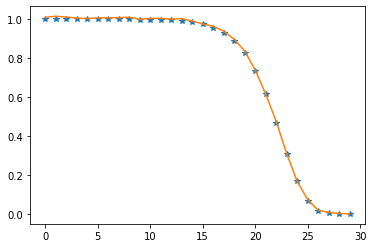

In [20]:
plt.plot(np.arange(30),y_test[13,:],'*')
plt.plot(np.arange(30),y_pred[13])

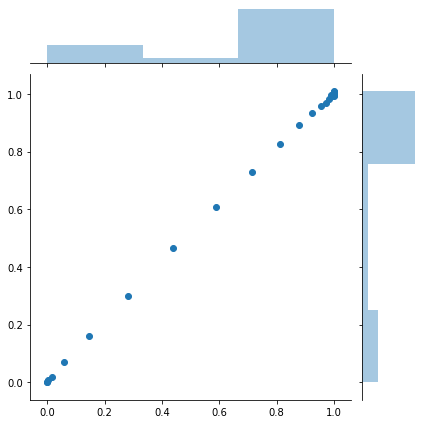

In [28]:
sns.jointplot(y_test[10],y_pred[10],kind='scatter')